In [1]:
import rosbag
import matplotlib.pyplot as plt

from sensor_msgs.msg import Image
from cv_bridge import CvBridge
import numpy as np
import cv2

In [2]:
# get list of topics
bag_name = 'harbor_sequence_1.bag'
bag = rosbag.Bag(bag_name)
topics = bag.get_type_and_topic_info()[1].keys()
types = []
for i in range(0,len(bag.get_type_and_topic_info()[1].values())):
    types.append(list(bag.get_type_and_topic_info()[1].values())[i][0])
    
print(topics)

dict_keys(['/barometer_node/depth', '/barometer_node/pressure', '/barometer_node/raw_data', '/barometer_node/temperature', '/camera/camera_info', '/camera/image_raw', '/camera/ueye_info', '/rtimulib_node/imu', '/rtimulib_node/mag'])


(0.0, 5.0)

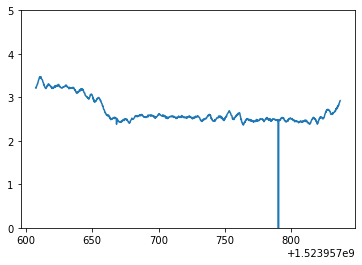

In [3]:
# show depth

timestamps = []
pressure = []

for topic, msg, t in rosbag.Bag(bag_name).read_messages():
    if topic == "/barometer_node/depth":
        #print(msg, msg.fluid_pressure)
        timestamps.append(msg.header.stamp.secs + msg.header.stamp.nsecs * 1e-9)
        pressure.append(msg.fluid_pressure)

plt.plot(timestamps, pressure)
plt.ylim(0,5)

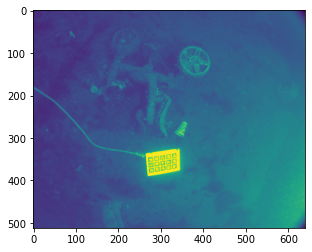

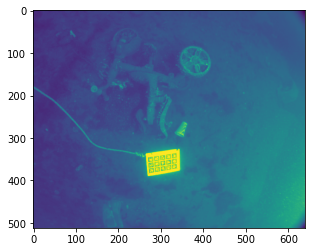

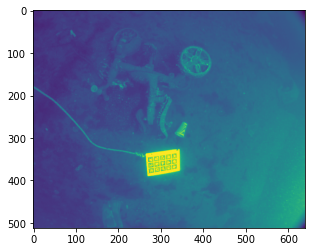

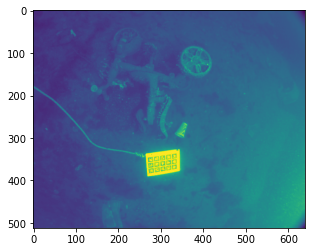

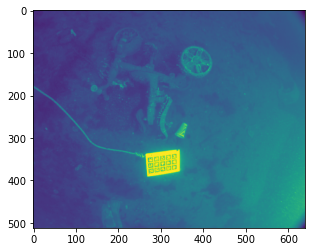

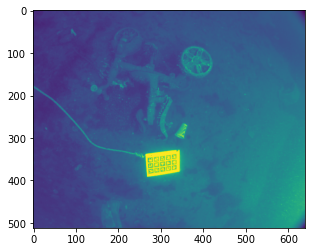

In [5]:
# show camera images

timestamps = []
images = []

bridge = CvBridge()

idx = 0
for topic, msg, t in rosbag.Bag(bag_name).read_messages():
    if topic == "/camera/image_raw":
        timestamps.append(msg.header.stamp.secs + msg.header.stamp.nsecs * 1e-9)
        images.append(bridge.imgmsg_to_cv2(msg, desired_encoding="passthrough"))
        idx += 1
        
    if idx > 5:
        break
         
for img in images:
    plt.figure()
    plt.imshow(img)

In [6]:
# show imu

timestamps = []
linear_acceleration = []

bridge = CvBridge()

idx = 0
for topic, msg, t in rosbag.Bag(bag_name).read_messages():
    if topic == "/rtimulib_node/imu":
        timestamps.append(msg.header.stamp.secs + msg.header.stamp.nsecs * 1e-9)
        linear_acceleration.append([msg.linear_acceleration.x, msg.linear_acceleration.y, msg.linear_acceleration.z])

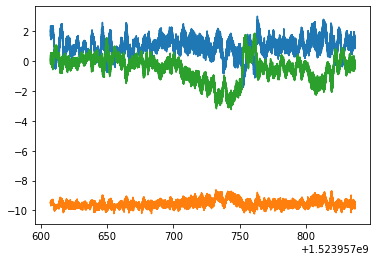

In [7]:
plt.plot(timestamps, np.array(linear_acceleration))